In [315]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Additional Data Source

The data below was obtained from the CDC. This data is used to supplement the project and presentation.

In [316]:
df = pd.read_csv('./data/covid_deaths.csv')
df.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,08/05/2020,02/01/2020,08/01/2020,United States,All,Under 1 year,15.0,8832.0,82.0,2.0,14.0,109.0,NaN
1,08/05/2020,02/01/2020,08/01/2020,United States,All,1-4 years,10.0,1690.0,55.0,2.0,41.0,104.0,NaN
2,08/05/2020,02/01/2020,08/01/2020,United States,All,5-14 years,20.0,2611.0,86.0,6.0,50.0,150.0,NaN
3,08/05/2020,02/01/2020,08/01/2020,United States,All,15-24 years,225.0,16353.0,326.0,77.0,52.0,522.0,NaN
4,08/05/2020,02/01/2020,08/01/2020,United States,All,25-34 years,1074.0,33993.0,1250.0,477.0,150.0,1983.0,NaN


In [317]:
df.columns

Index(['Data as of', 'Start week', 'End Week', 'State', 'Sex', 'Age group',
       'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

In [318]:
df['State'].unique()

array(['United States', 'United States Total', 'Alabama', 'Alabama Total',
       'Alaska', 'Alaska Total', 'Arizona', 'Arizona Total', 'Arkansas',
       'Arkansas Total', 'California', 'California Total', 'Colorado',
       'Colorado Total', 'Connecticut', 'Connecticut Total', 'Delaware',
       'Delaware Total', 'District of Columbia',
       'District of Columbia Total', 'Florida', 'Florida Total',
       'Georgia', 'Georgia Total', 'Hawaii', 'Hawaii Total', 'Idaho',
       'Idaho Total', 'Illinois', 'Illinois Total', 'Indiana',
       'Indiana Total', 'Iowa', 'Iowa Total', 'Kansas', 'Kansas Total',
       'Kentucky', 'Kentucky Total', 'Louisiana', 'Louisiana Total',
       'Maine', 'Maine Total', 'Maryland', 'Maryland Total',
       'Massachusetts', 'Massachusetts Total', 'Michigan',
       'Michigan Total', 'Minnesota', 'Minnesota Total', 'Mississippi',
       'Mississippi Total', 'Missouri', 'Missouri Total', 'Montana',
       'Montana Total', 'Nebraska', 'Nebraska Total', 'Neva

In [319]:
state = df['State'] == 'United States'
sex = df['Sex'] == 'All'
by_age = df[state & sex][['Age group','COVID-19 Deaths']]
#Exclude row "all ages"
by_age = by_age.iloc[0:10]

Text(0.5, 1.0, 'COVID related Deaths by Age Group in the United States')

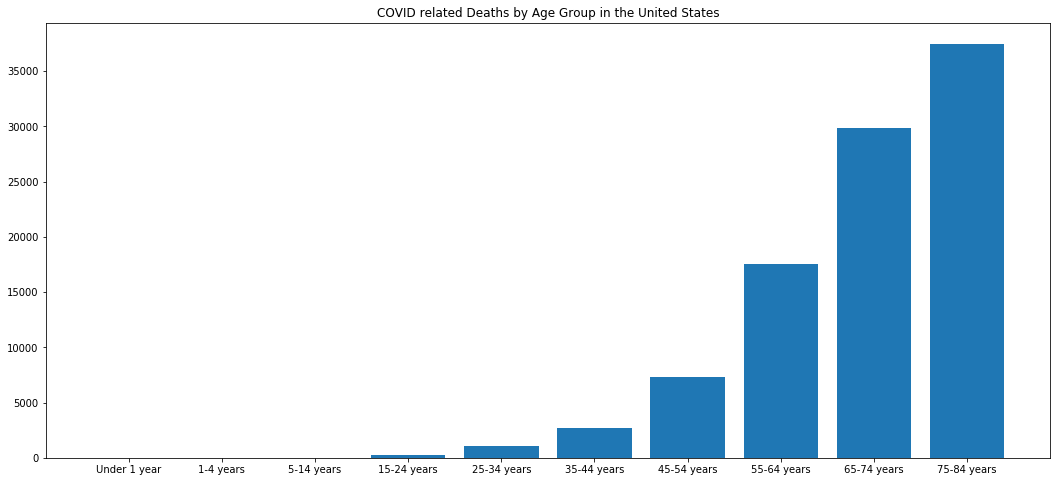

In [320]:
#plot by COVID deaths by age group
plt.figure(figsize = (18,8))
plt.bar(x = by_age['Age group'],height = by_age['COVID-19 Deaths']);
plt.title('COVID related Deaths by Age Group in the United States')

The danger of dying from COVID seems to increase exponentially with age.

Text(0.5, 1.0, 'COVID-19 Deaths by Gender')

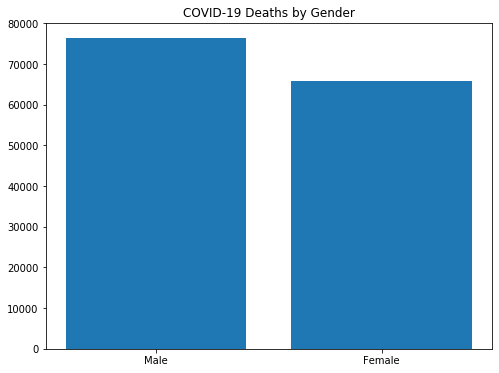

In [321]:
# get COVID deaths by sex
male = df['Sex'] == 'Male'
female = df['Sex'] == 'Female'
age = df['Age group'] == 'All ages'
by_sex = df[state & (male | female) & age][['Sex', 'COVID-19 Deaths']]

# plot COVID deaths by sex
plt.figure(figsize = (8,6))
plt.bar(x = by_sex['Sex'],height = by_sex['COVID-19 Deaths']);
plt.title('COVID-19 Deaths by Gender')

In [322]:
# Percent of male covid deaths
male_perc = by_sex[by_sex['Sex'] == 'Male'].values[0][1]/by_sex.sum().values[1]
male_perc

0.5370432898605777

54% of deaths from COVID are men.

In [323]:
# Men are 16 percent more likely to die from COVID than women
male_perc/(1-male_perc) - 1

0.16002917356753232

Men have a 16% higher probability of dying from COVID compared to women. 

In [338]:
state = df['State'] != 'United States'
sex = df['Sex'] == 'All'
age = df['Age group'].str.lower() == 'all ages'

# Calculate COVID Death to Total Death ratio
df['Death Ratio'] = df['COVID-19 Deaths']/df['Total Deaths']

by_state = df[state & sex & age][['State', 'COVID-19 Deaths']]

In [339]:
# strip "Total"
by_state['State'] = by_state['State'].str.replace(' Total', '')

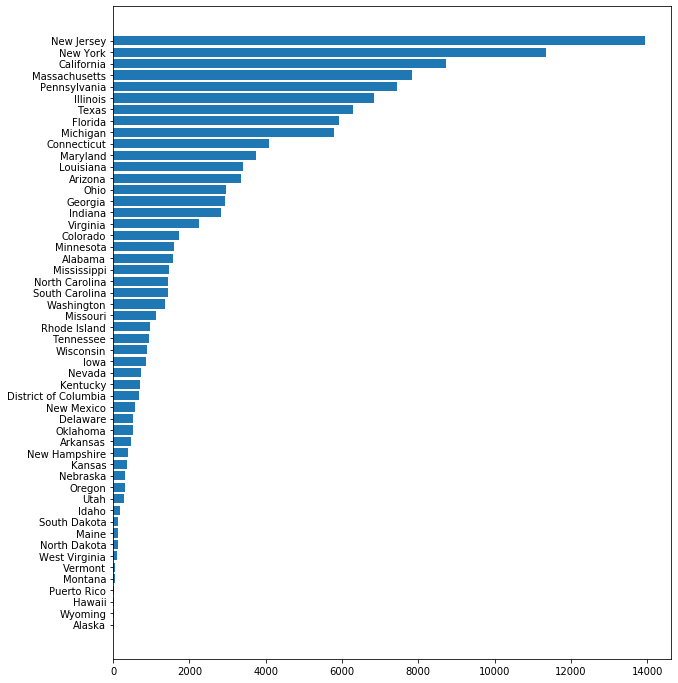

In [340]:
# plot COVID deaths by sex
by_state = by_state.sort_values('COVID-19 Deaths')
# drop new york city and United States
by_state = by_state.drop(labels = [37, 921],axis = 0)

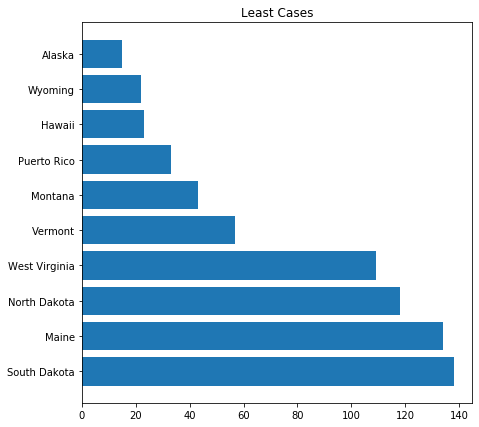

In [365]:
# States with lowest deaths
plt.figure(figsize = (7,7))
plt.title('Least Cases')
by_state.sort_values('COVID-19 Deaths', inplace = True, ascending = False)
plt.barh(width = by_state['COVID-19 Deaths'].iloc[-10:],y = by_state['State'].iloc[-10:]);

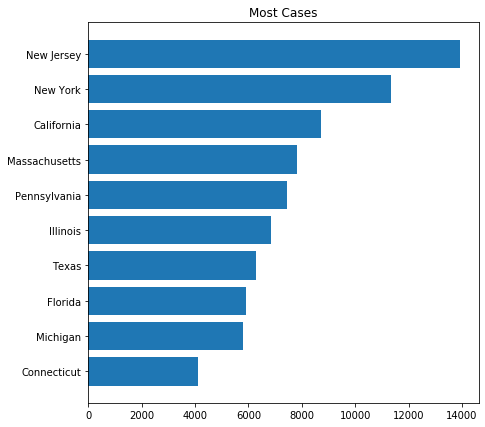

In [366]:
# States with highest deaths
plt.figure(figsize = (7,7))
plt.title('Most Cases')
by_state.sort_values('COVID-19 Deaths', inplace = True, ascending = True)
plt.barh(width = by_state['COVID-19 Deaths'].iloc[-10:],y = by_state['State'].iloc[-10:]);

In [327]:
# read in data on state populations 2019
state_pop = pd.read_csv('./data/state_populations.csv')

In [328]:
# lower cases state names
state_pop['State'] = state_pop['State'].str.lower()

In [329]:
#lower case state names
by_state['State'] = by_state['State'].str.lower()

In [330]:
# dataframe: Deaths and population for each state
state_df = pd.merge(by_state, state_pop, on= 'State')

In [331]:
state_df['ratio'] = state_df['COVID-19 Deaths']/state_df['2018 Population']

In [332]:
state_df = state_df.sort_values('ratio')

In [348]:
state_df['State'] = state_df['State'].str.title()

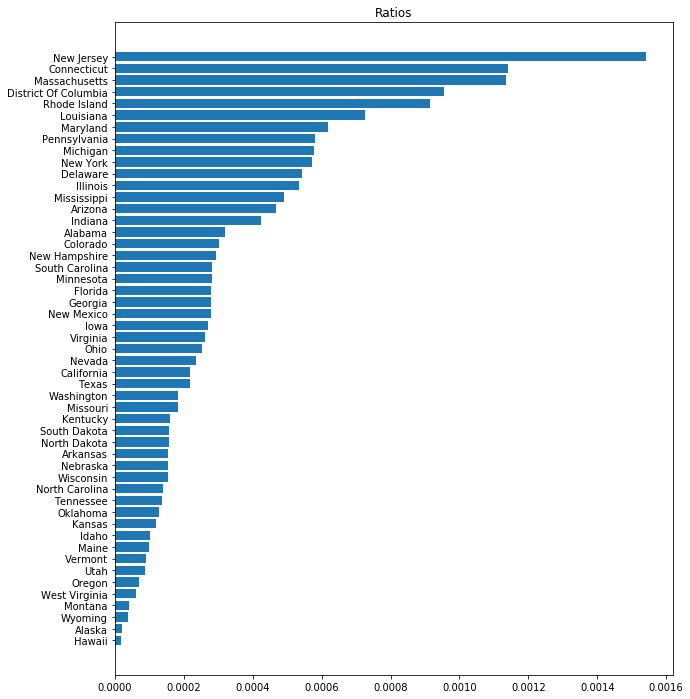

In [369]:
plt.figure(figsize = (10,12))
plt.title('Ratios')
plt.barh(width = state_df['ratio'],y = state_df['State']);

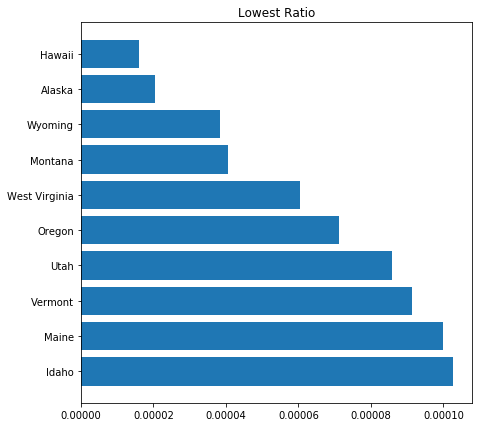

In [367]:

plt.figure(figsize = (7,7))
plt.title('Lowest Ratio')
state_df.sort_values('ratio', inplace = True, ascending = False)
plt.barh(width = state_df['ratio'].tail(10),y = state_df['State'].tail(10));

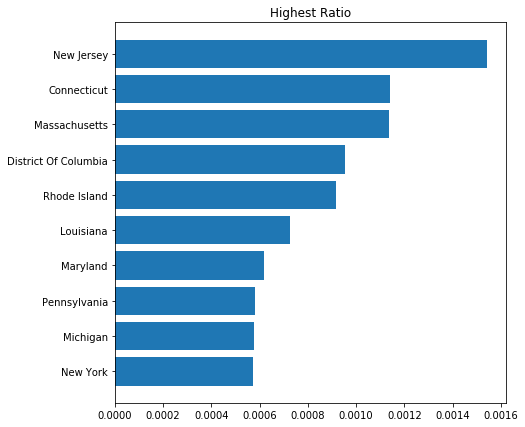

In [368]:
plt.figure(figsize = (7,7))
plt.title('Highest Ratio')
state_df.sort_values('ratio', inplace = True, ascending = True)
plt.barh(width = state_df['ratio'].tail(10),y = state_df['State'].tail(10));